In [2]:
!pip install yfinance alpha_vantage matplotlib scikit-learn keras tensorflow 

In [2]:
%pip install -r requirements.txt

  Using cached alpha_vantage-3.0.0-py3-none-any.whl.metadata (12 kB)
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached tensorflow-2.20.0-cp311-cp311-win_amd64.whl.metadata (4.6 kB)
  Using cached gru-0.0.1rc25-py3-none-any.whl.metadata (12 kB)
  Using cached cookiecutter-2.6.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached langgraph-1.0.4-py3-none-any.whl.metadata (7.8 kB)
  Using cached langgraph_checkpoint_postgres-3.0.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached celery-5.6.0rc2-py3-none-any.whl.metadata (23 kB)
  Using cached langgraph_checkpoint-3.0.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached langgraph_prebuilt-1.0.5-py3-none-any.whl.metadata (5.2 kB)
Using cached alpha_vantage-3.0.0-py3-none-any.whl (35 kB)
Using cached keras-3.12.0-py3-none-any.whl (1.5 MB)
Using cached tensorflow-2.20.0-cp311-cp311-win_amd64.whl (331.8 MB)
Using cached gru-0.0.1rc25-py3-none-any.whl (124 kB)
Using cached celery-5.6.0rc2-py3-none-any.whl (444 kB)
Usin

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\KIIT0001\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\keras\\src\\trainers\\data_adapters\\torch_data_loader_adapter.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import yfinance as yf
import pandas as pd

# Example 1: Indian Stock (Reliance Industries on NSE)
reliance = yf.download("RELIANCE.NS", start="2020-01-01", end="2025-03-31")

# Example 2: Japanese Stock (Toyota on Tokyo Stock Exchange)
toyota = yf.download("7203.T", start="2020-01-01", end="2025-03-31")

# Example 3: Hong Kong Stock (Tencent Holdings)
tencent = yf.download("0700.HK", start="2020-01-01", end="2025-03-31")

print("\nINDIAN STOCK\n",reliance.head())
print("\nJAPANESE STOCK \n",toyota.head())
print("\nHONG KONG STOCK \n",tencent.head())


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_40484\2742776612.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  reliance = yf.download("RELIANCE.NS", start="2020-01-01", end="2025-03-31")
[*********************100%***********************]  1 of 1 completed
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_40484\2742776612.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  toyota = yf.download("7203.T", start="2020-01-01", end="2025-03-31")
[*********************100%***********************]  1 of 1 completed
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_40484\2742776612.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tencent = yf.download("0700.HK", start="2020-01-01", end="2025-03-31")
[*********************100%***********************]  1 of 1 completed


INDIAN STOCK
 Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2020-01-01  675.324219  683.152914  673.490123  679.081997    14004468
2020-01-02  686.821228  689.348791  676.397899  676.397899    17710316
2020-01-03  687.648865  689.661956  681.318790  685.792313    20984698
2020-01-06  671.700684  683.510767  670.134933  679.976719    24519177
2020-01-07  682.034485  686.463273  677.068828  679.529260    16683622

JAPANESE STOCK 
 Price             Close         High          Low         Open    Volume
Ticker           7203.T       7203.T       7203.T       7203.T    7203.T
Date                                                                    
2020-01-06  1270.500977  1280.745557  1264.622915  1276.211134  33361500
2020-01-07  1295.692871  1296.868504  1279.570227  1285.448289  24803500
2020-01-08  1279.234253  1283.4328

In [5]:
# Data preprocessing

# Example 1: Indian Stock (Reliance Industries on NSE)
df= reliance = yf.download("RELIANCE.NS", start="2020-01-01", end="2025-03-31") # Download historical data for Reliance Industries
      
df=df.reset_index()  # Reset index to make 'Date' a column

# Calculate technical indicators
df['MA50'] =df['Close'].rolling(window=50).mean() # 50-day moving average
df['MA200'] =df['Close'].rolling(window=200).mean() # 200-day moving average
# Calculate daily returns and volatility
df['Return'] =df['Close'].pct_change()   # Daily returns
# Annualized volatility (assuming 252 trading days in a year)
df['Volatility'] = df['Return'].rolling(window=50).std() * (252**0.5) # 50-day rolling volatility
# Drop rows with NaN values resulting from calculations
df=df.dropna()   # Remove rows with NaN values


# Example 2: Japanese Stock (Toyota on Tokyo Stock Exchange)       
toyota = yf.download("7203.T", start="2020-01-01", end="2025-03-31")        # Download historical data for Toyota
toyota.dropna(inplace=True)                  
toyota['Date'] = toyota.index
toyota.reset_index(drop=True, inplace=True)
toyota['MA50'] = toyota['Close'].rolling(window=50).mean()
toyota['MA200'] = toyota['Close'].rolling(window=200).mean()
toyota['Return'] = toyota['Close'].pct_change()                            # Daily returns
toyota['Volatility'] = toyota['Return'].rolling(window=50).std()*(252**0.5) # 50-day rolling volatility
# Drop rows with NaN values resulting from calculations
toyota.dropna(inplace=True)

# Example 3: Hong Kong Stock (Tencent Holdings)
tencent = yf.download("0700.HK", start="2020-01-01", end="2025-03-31")       # Download historical data for Tencent
tencent.dropna(inplace=True)     # Remove rows with missing values
tencent['Date'] = tencent.index     # Add a 'Date' column from the index
tencent.reset_index(drop=True, inplace=True)  # Reset index to make 'Date' a column
tencent['MA50'] = tencent['Close'].rolling(window=50).mean() # 50-day moving average
tencent['MA200'] = tencent['Close'].rolling(window=200).mean() # 200-day moving average
tencent['Return'] = tencent['Close'].pct_change()   # Daily returns
# Annualized volatility (assuming 252 trading days in a year)
tencent['Volatility'] = tencent['Return'].rolling(window=50).std() * (252**0.5) # 50-day rolling volatility
# Drop rows with NaN values resulting from calculations
tencent.dropna(inplace=True)  # Remove rows with NaN values

print(tencent.columns.tolist())

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_40484\3604325608.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df= reliance = yf.download("RELIANCE.NS", start="2020-01-01", end="2025-03-31") # Download historical data for Reliance Industries
[*********************100%***********************]  1 of 1 completed
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_40484\3604325608.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  toyota = yf.download("7203.T", start="2020-01-01", end="2025-03-31")        # Download historical data for Toyota
[*********************100%***********************]  1 of 1 completed
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_40484\3604325608.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tencent = yf.download("0700.HK", start="2020-01-01", end="2025-03-31")       # Download historical data for Tencent
[*********************100%***********************

[('Close', '0700.HK'), ('High', '0700.HK'), ('Low', '0700.HK'), ('Open', '0700.HK'), ('Volume', '0700.HK'), ('Date', ''), ('MA50', ''), ('MA200', ''), ('Return', ''), ('Volatility', '')]


In [6]:
print("INDIAN NSE\n\n",df.head())

INDIAN NSE

 Price        Date       Close         High         Low        Open  \
Ticker            RELIANCE.NS  RELIANCE.NS RELIANCE.NS RELIANCE.NS   
199    2020-10-19  986.757080  1010.562239  977.212384  993.037115   
200    2020-10-20  977.552490   994.374790  975.897432  988.026751   
201    2020-10-21  963.360046   993.921326  951.185392  983.038983   
202    2020-10-22  955.356995   966.942164  948.124787  964.629675   
203    2020-10-23  958.122986   968.075765  950.573367  954.926269   

Price       Volume        MA50       MA200    Return Volatility  
Ticker RELIANCE.NS                                               
199       31200385  990.458931  758.645281  0.000184   0.258883  
200       18482288  990.785856  760.156422 -0.009328   0.258194  
201       34082321  990.702424  761.539116 -0.014518   0.259963  
202       30802210  990.515157  762.877657 -0.008307   0.260560  
203       23422125  990.433540  764.309769  0.002895   0.260577  


### Exploratory Data Analysis

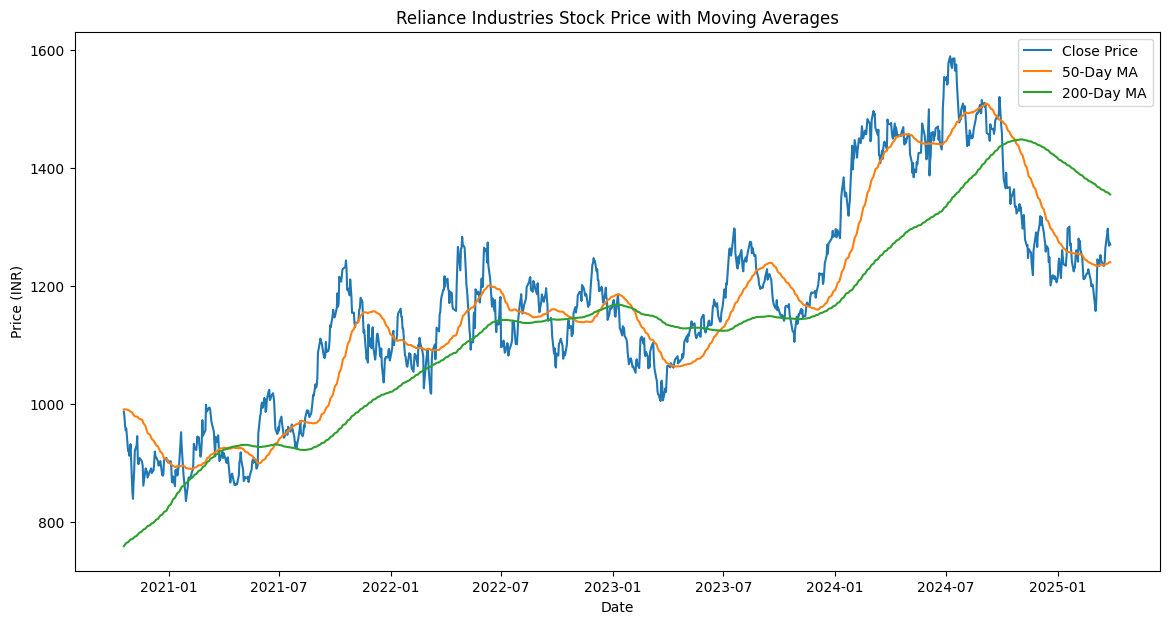

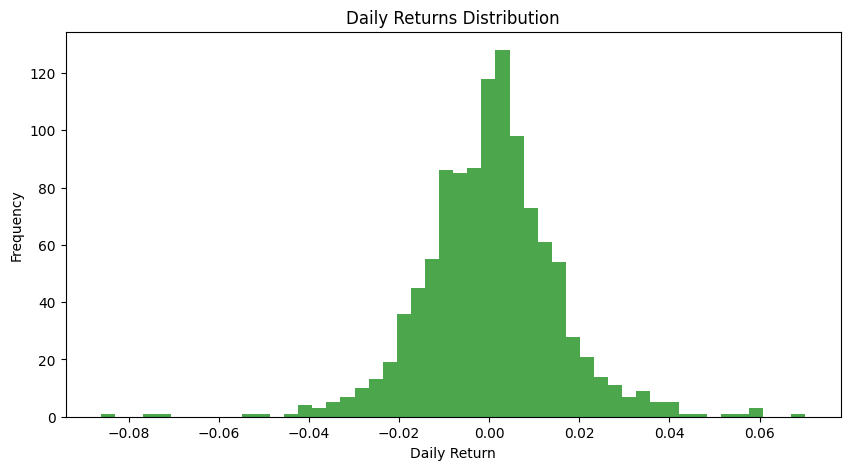

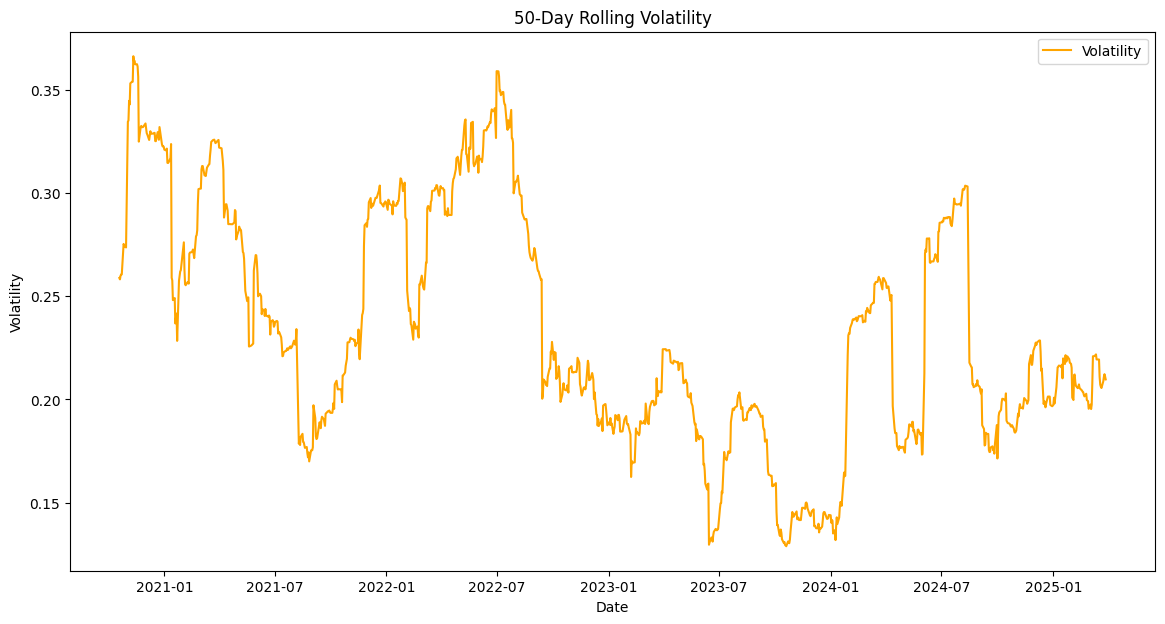

In [7]:
#Exploaratory Data Analysis (EDA) of NSE
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA50'], label='50-Day MA')
plt.plot(df['Date'], df['MA200'], label='200-Day MA')
plt.title('Reliance Industries Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()
# Daily Returns Distribution
plt.figure(figsize=(10,5))
plt.hist(df['Return'], bins=50, alpha=0.7, color='green')
plt.title('Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()
# Volatility Over Time
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Volatility'], label='Volatility', color='orange')
plt.title('50-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


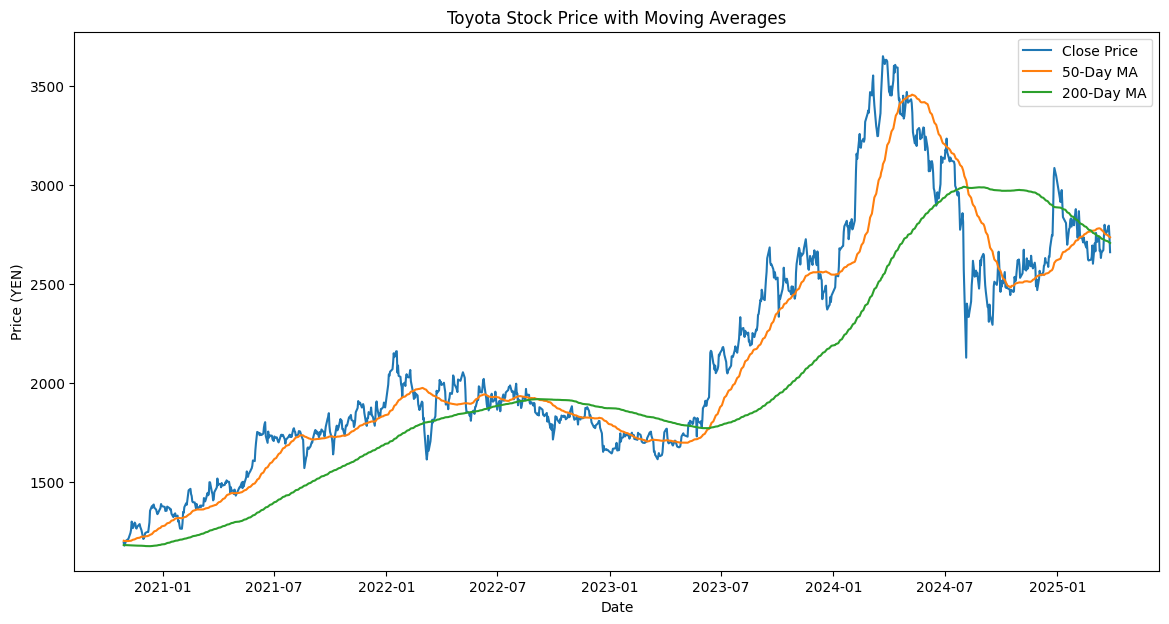

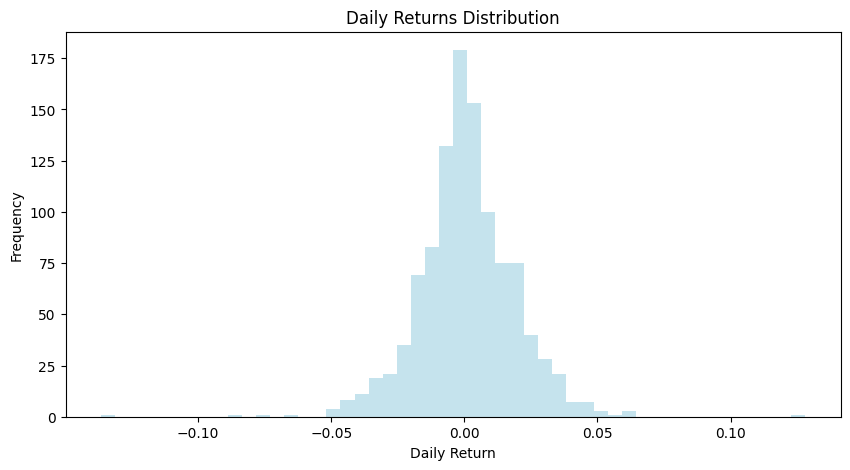

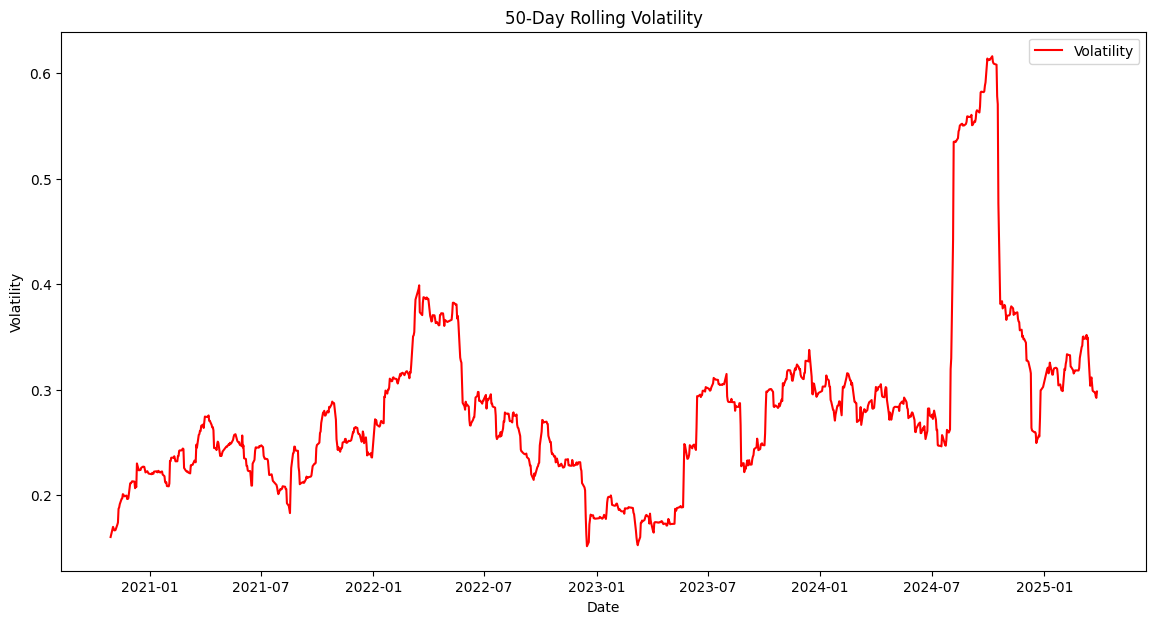

In [8]:
#Exploratory Data Analysis of Toyota
plt.figure(figsize=(14,7))
plt.plot(toyota['Date'], toyota['Close'], label='Close Price')
plt.plot(toyota['Date'], toyota['MA50'], label='50-Day MA')
plt.plot(toyota['Date'], toyota['MA200'], label='200-Day MA')
plt.title('Toyota Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (YEN)')
plt.legend()
plt.show()
# Daily Returns Distribution
plt.figure(figsize=(10,5))
plt.hist(toyota['Return'], bins=50, alpha=0.7, color='lightblue')
plt.title('Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()
# Volatility Over Time
plt.figure(figsize=(14,7))
plt.plot(toyota['Date'], toyota['Volatility'], label='Volatility', color='red')
plt.title('50-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()    
plt.show()

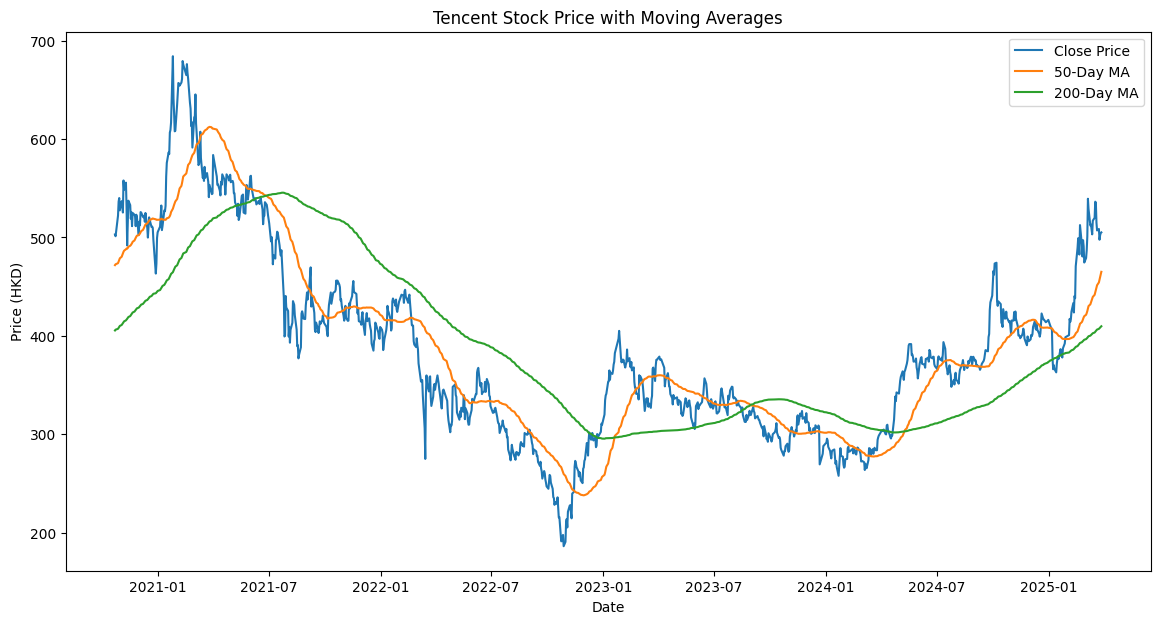

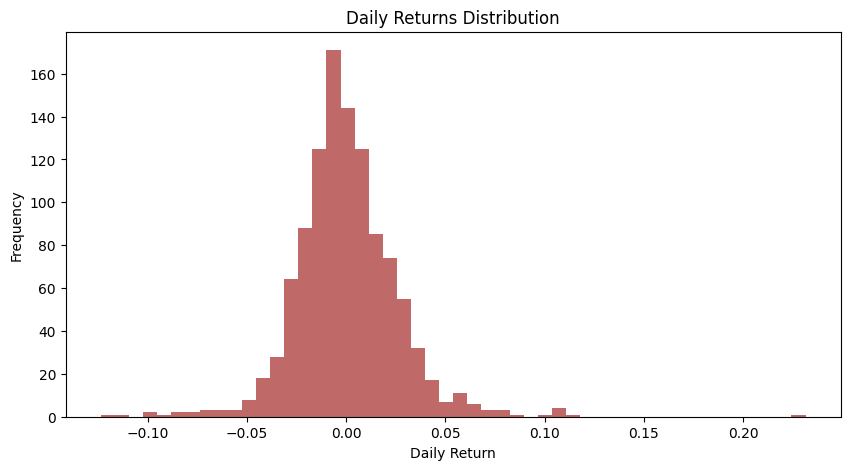

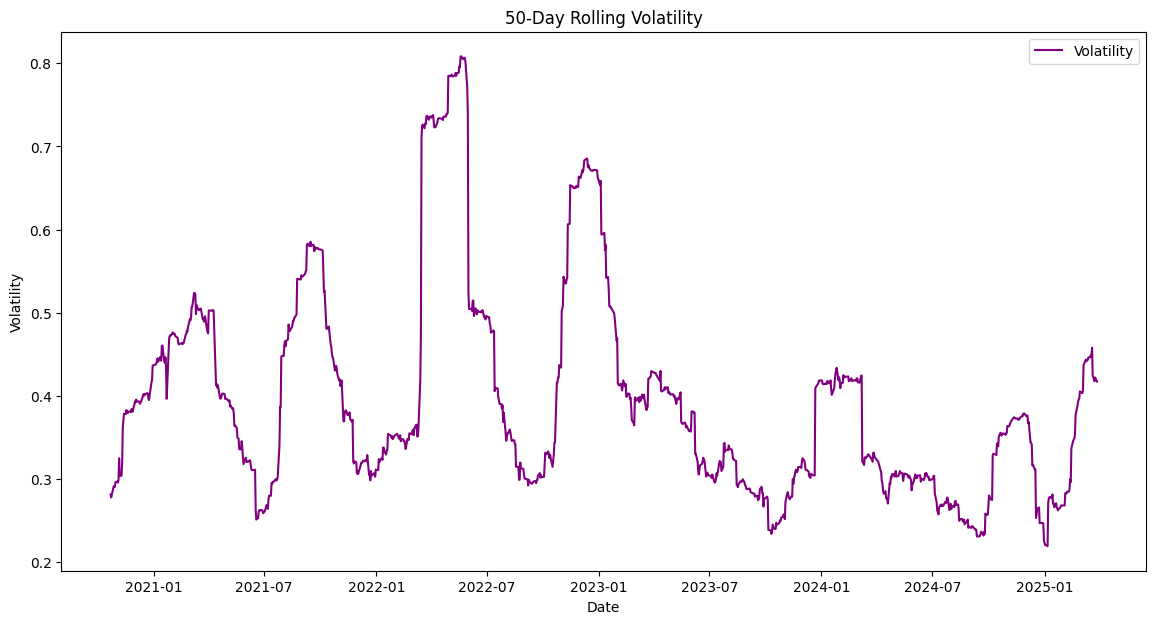

In [ ]:
#EDA of Tencent
plt.figure(figsize=(14,7))
plt.plot(tencent['Date'], tencent['Close'], label='Close Price')
plt.plot(tencent['Date'], tencent['MA50'], label='50-Day MA')
plt.plot(tencent['Date'], tencent['MA200'], label='200-Day MA')
plt.title('Tencent Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (HKD)')
plt.legend()
plt.show()
# Daily Returns Distribution
plt.figure(figsize=(10,5))
plt.hist(tencent['Return'], bins=50, alpha=0.7, color='brown')
plt.title('Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()
# Volatility Over Time
plt.figure(figsize=(14,7))
plt.plot(tencent['Date'], tencent['Volatility'], label='Volatility', color='purple')
plt.title('50-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


#### Forecasting Stock Prices

In [ ]:
!pip install keras


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# One day ahead Stock Price Prediction using LSTM for NSE
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import math
from sklearn.model_selection import train_test_split
import pickle

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close', 'MA50', 'MA200', 'Volatility']])
# Save the scaler for future use
pickle.dump(scaler, open("nse_scaler.pkl", "wb"))
pickle.dump(scaled_data, open("nse_scaled_data.pkl", "wb"))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, 0])  # predict Close
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
# For time series keep chronological order (no shuffle)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# Build LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2]))) # First LSTM layer
model.add(Dropout(0.2)) 
model.add(LSTM(units=50, return_sequences=False)) # Last LSTM layer
model.add(Dropout(0.2)) # Dropout layer to prevent overfitting
model.add(Dense(units=1))  # Predicting the closing price
model.compile(optimizer='adam', loss='mean_squared_error') # Compile the model
# Train the model
model.fit(x_train, y_train, epochs=150, batch_size=32, validation_data=(x_test, y_test))
# Make predictions
predictions = model.predict(x_test)
#add 3 columns of zeros (dummy placeholders):
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1))[:,0] # Rescale back to original values
# Rescale y_test to original values for accurate RMSE calculation
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:,0]
# Evaluate the model
rmse = math.sqrt(mean_squared_error(y_test_rescaled, predictions))
print(f'Root Mean Squared Error: {rmse}')
model.save('stock_price_model.h5')
# Stock Price Prediction using LSTM
model = tf.keras.models.load_model('stock_price_model.h5')
# Prepare the latest data for prediction
latest_data = scaled_data[-seq_length:]  # Last 'seq_length' days
latest_data = np.expand_dims(latest_data, axis=0)  # Reshape for model
# Predict the next day's closing price
predicted_price = model.predict(latest_data)
# Rescale back to original values
predicted_price = scaler.inverse_transform(np.concatenate((predicted_price, np.zeros((predicted_price.shape[0], 3))), axis=1))[:, 0] 
print(f'Predicted Next Day Closing Price: {predicted_price[0]}')


C:\Users\KIIT0001\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0388 - val_loss: 0.0239
Epoch 2/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0083 - val_loss: 0.0078
Epoch 3/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 4/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0052 - val_loss: 0.0037
Epoch 5/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0046 - val_loss: 0.0031
Epoch 6/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0040 - val_loss: 0.0031
Epoch 7/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 8/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0036 - val_loss: 0.0040
Epoch 9/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 10/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 11/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 12/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step

Root Mean Squared Error: 20.75826383765416


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step
Predicted Next Day Closing Price: 1274.5550028324687


In [ ]:
#mape
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test_rescaled, predictions)
print(f'Mean Absolute Percentage Error: {mape}%')

Mean Absolute Percentage Error: 1.6723005119126637%


In [ ]:
print(model.input_shape)



(None, 60, 4)


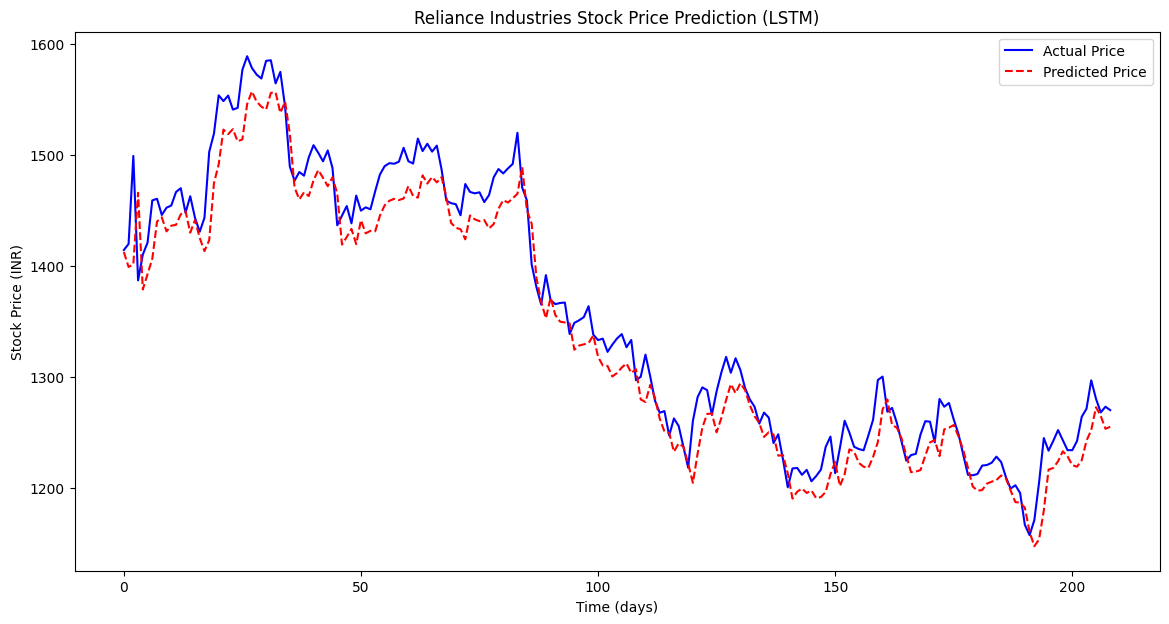

In [ ]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted values
plt.figure(figsize=(14,7))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions, label="Predicted Price", color="red", linestyle="--")
plt.title("Reliance Industries Stock Price Prediction (LSTM)")
plt.xlabel("Time (days)")
plt.ylabel("Stock Price (INR)")
plt.legend()
plt.show()


In [ ]:
#Save trained NSE model
model.save("stock_price_model.h5")
#Save the scaler for future use
with open("nse_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [ ]:
# One day ahead Stock Price Prediction using LSTM for Toyota
# Scale features
scaler_toyota = MinMaxScaler(feature_range=(0, 1))
scaled_data_toyota = scaler_toyota.fit_transform(toyota[['Close', 'MA50', 'MA200', 'Volatility']])
# Save the fitted scaler for future use
pickle.dump(scaler_toyota, open("toyota_scaler.pkl", "wb"))
pickle.dump(scaled_data_toyota, open("toyota_scaled_data.pkl", "wb"))
# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, 0])  # predict Close
    return np.array(X), np.array(y)
seq_length = 60
X, y = create_sequences(scaled_data_toyota, seq_length)   
# Split the data into training and testing sets
# For time series keep chronological order (no shuffle)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# Build LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2]))) # First LSTM layer
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False)) # Last LSTM layer
model.add(Dropout(0.2)) # Dropout layer to prevent overfitting
model.add(Dense(units=1))  # Predicting the closing price
model.compile(optimizer='adam', loss='mean_squared_error') # Compile the model
# Train the model
model.fit(x_train, y_train, epochs=150, batch_size=32, validation_data=(x_test, y_test))
# Make predictions
predictions = model.predict(x_test)
#add 3 columns of zeros (dummy placeholders):
predictions = scaler_toyota.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1))[:,0] # Rescale back to original values
# Rescale y_test to original values for accurate RMSE calculation
y_test_rescaled = scaler_toyota.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:,0]
# Evaluate the model
rmse = math.sqrt(mean_squared_error(y_test_rescaled, predictions))
print(f'Root Mean Squared Error: {rmse}')
model.save('toyota_stock_price_model.h5')
# Stock Price Prediction using LSTM
model = tf.keras.models.load_model('toyota_stock_price_model.h5')
# Prepare the latest data for prediction
latest_data = scaled_data_toyota[-seq_length:]  # Last 'seq_length' days
latest_data = np.expand_dims(latest_data, axis=0)  # Reshape for model
# Predict the next day's closing price
predicted_price = model.predict(latest_data)
# Rescale back to original values
predicted_price = scaler_toyota.inverse_transform(np.concatenate((predicted_price, np.zeros((predicted_price.shape[0], 3))), axis=1))[:, 0]
print(f'Predicted Next Day Closing Price: {predicted_price[0]}')

#mape
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test_rescaled, predictions)
print(f'Mean Absolute Percentage Error: {mape}%')


Epoch 1/150


c:\Users\KIIT0001\Desktop\code_plac_prac\python\PROJECT\proj1\clean_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0142 - val_loss: 0.0043
Epoch 2/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0041 - val_loss: 0.0156
Epoch 3/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0034 - val_loss: 0.0069
Epoch 4/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0030 - val_loss: 0.0049
Epoch 5/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 6/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0025 - val_loss: 0.0034
Epoch 7/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0026 - val_loss: 0.0079
Epoch 8/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0034 - val_loss: 0.0110
Epoch 9/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 10/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0023 - val_loss: 0.0054
Epoch 11/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0023 - val_loss: 0.0037
Epoch 12/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0

Root Mean Squared Error: 74.89435887915124
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Predicted Next Day Closing Price: 2706.5311363738147
Mean Absolute Percentage Error: 1.9718067793418794%


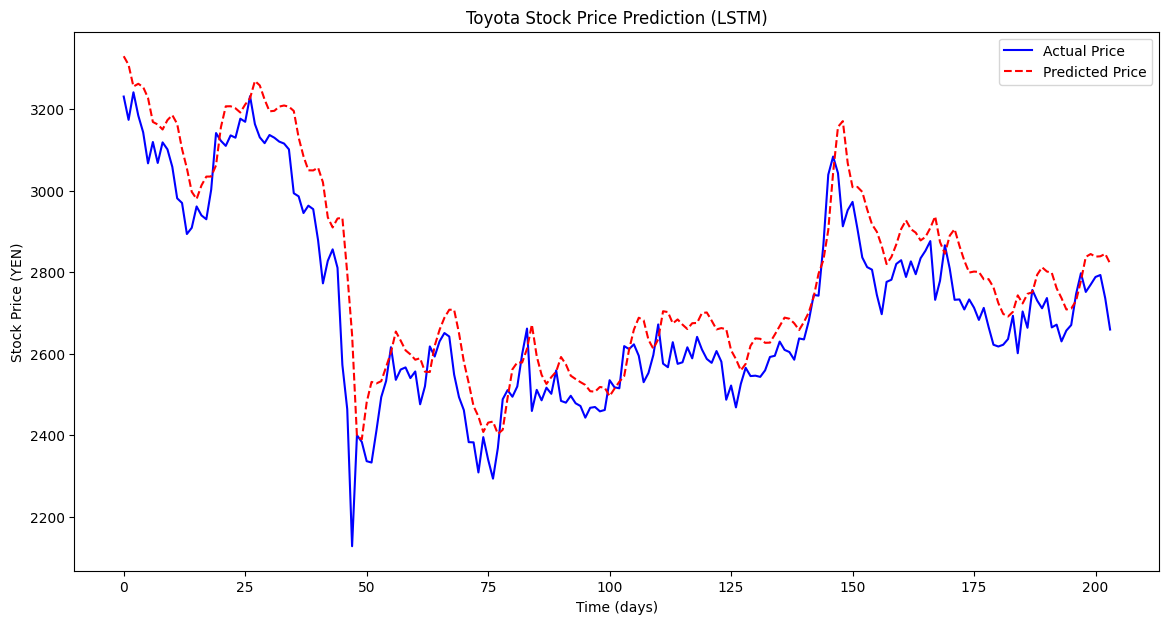

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions, label="Predicted Price", color="red", linestyle="--")
plt.title("Toyota Stock Price Prediction (LSTM)")
plt.xlabel("Time (days)")
plt.ylabel("Stock Price (YEN)")
plt.legend()
plt.show()

In [ ]:
model.save("toyota_stock_price_model.h5")
with open("toyota_scaler.pkl", "wb") as f:
    pickle.dump(scaler_toyota, f)

Epoch 1/150


c:\Users\KIIT0001\Desktop\code_plac_prac\python\PROJECT\proj1\clean_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0238 - val_loss: 0.0068
Epoch 2/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0069 - val_loss: 0.0030
Epoch 3/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0041 - val_loss: 0.0025
Epoch 4/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0038 - val_loss: 0.0028
Epoch 5/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0036 - val_loss: 0.0042
Epoch 6/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 7/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 8/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 9/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 10/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 11/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 12/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0

Root Mean Squared Error (Tencent): 11.04595158057273
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted Next Day Closing Price (Tencent): 500.5476991473734
Mean Absolute Percentage Error: 1.8825383912712053%


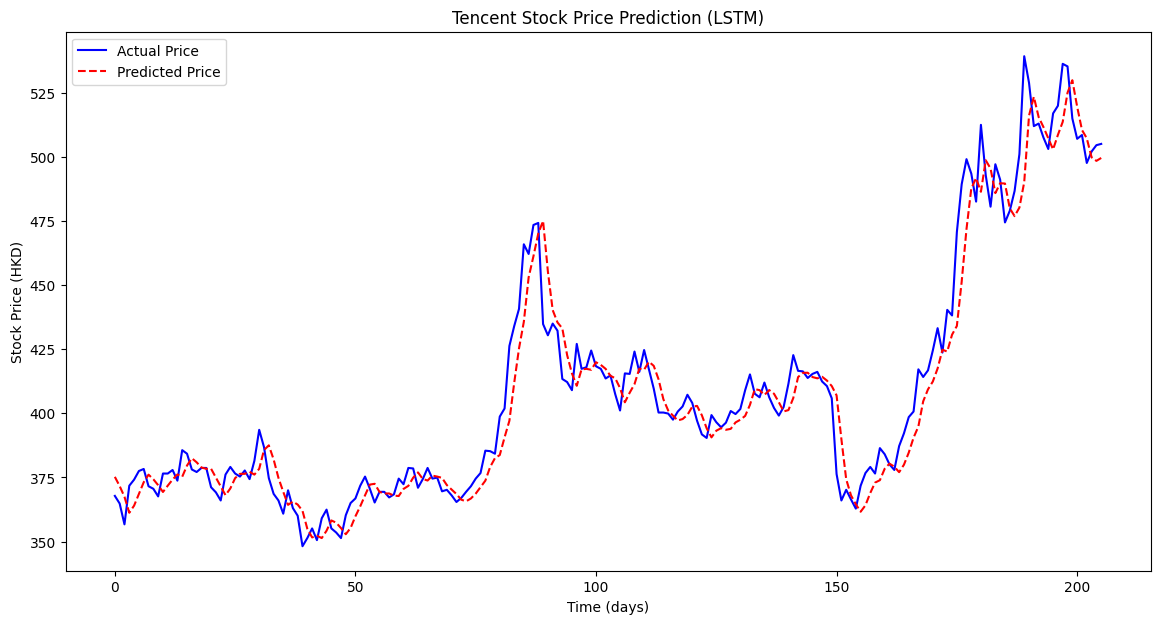

In [ ]:
# --- One day ahead Stock Price Prediction using LSTM for Tencent ---
scaler_tencent = MinMaxScaler(feature_range=(0, 1))
scaled_data_tencent = scaler_tencent.fit_transform(tencent[['Close', 'MA50', 'MA200', 'Volatility']])

# Save Tencent scaler + scaled data
pickle.dump(scaler_tencent, open("tencent_scaler.pkl", "wb"))
pickle.dump(scaled_data_tencent, open("tencent_scaled_data.pkl", "wb"))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, 0])  # predict Close
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data_tencent, seq_length)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
model.fit(x_train, y_train, epochs=150, batch_size=32, validation_data=(x_test, y_test))

# Predict
predictions = model.predict(x_test)
predictions = scaler_tencent.inverse_transform(
    np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1)
)[:,0]

# Rescale y_test
y_test_rescaled = scaler_tencent.inverse_transform(
    np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1)
)[:,0]

# RMSE
rmse = math.sqrt(mean_squared_error(y_test_rescaled, predictions))
print(f'Root Mean Squared Error (Tencent): {rmse}')

# Save Tencent model
model.save('tencent_stock_price_model.h5')

# Save scaler again (this time correct one)
with open("tencent_scaler.pkl", "wb") as f:
    pickle.dump(scaler_tencent, f)

# Forecasts
latest_data = scaled_data_tencent[-seq_length:]
latest_data = np.expand_dims(latest_data, axis=0)
predicted_price = model.predict(latest_data)
predicted_price = scaler_tencent.inverse_transform(
    np.concatenate((predicted_price, np.zeros((predicted_price.shape[0], 3))), axis=1)
)[:, 0]
print(f'Predicted Next Day Closing Price (Tencent): {predicted_price[0]}')

#mape
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test_rescaled, predictions)
print(f'Mean Absolute Percentage Error: {mape}%')
plt.figure(figsize=(14,7))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions, label="Predicted Price", color="red", linestyle="--")
plt.title("Tencent Stock Price Prediction (LSTM)")
plt.xlabel("Time (days)")
plt.ylabel("Stock Price (HKD)")
plt.legend()
plt.show()

In [ ]:
model.save("tencent_stock_price_model.h5")
with open("tencent_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

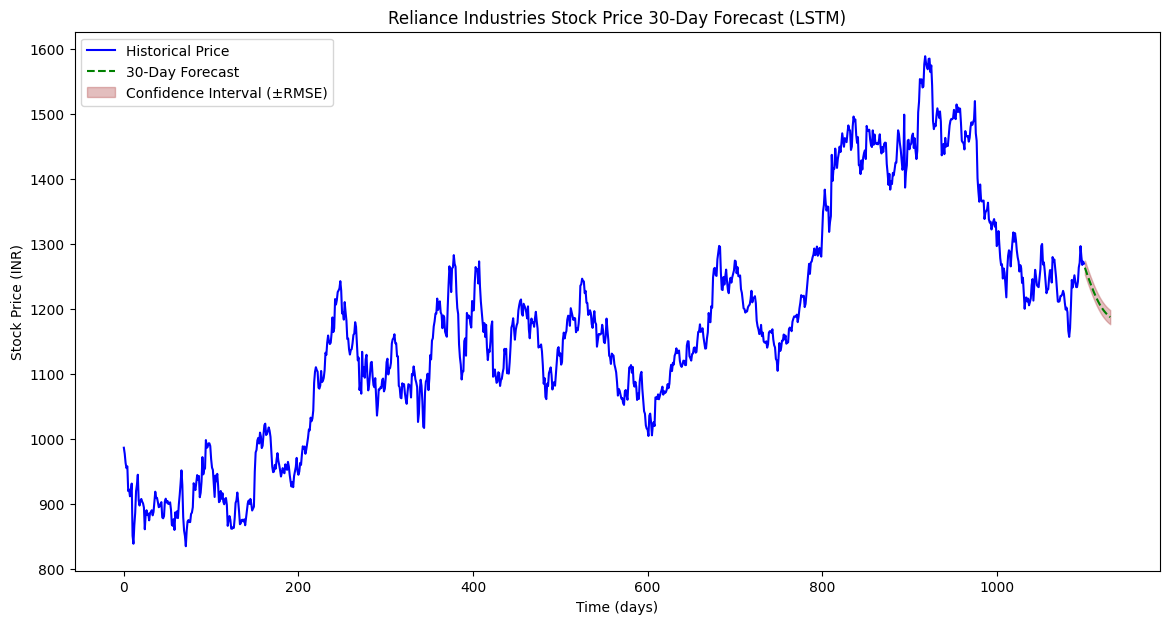

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

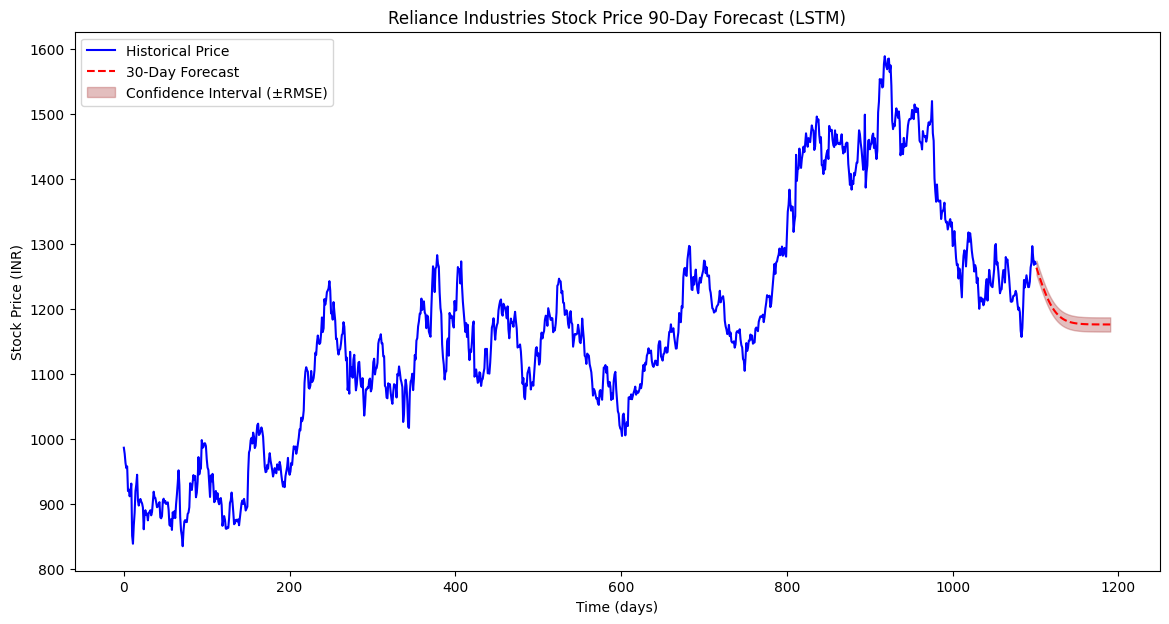

In [ ]:
# 30 day forecast for NSE
future_days = 30
future_predictions = []
current_sequence = scaled_data[-seq_length:]  # Start with the last 'seq_length' days
for _ in range(future_days):
    current_sequence_reshaped = np.expand_dims(current_sequence, axis=0)  # Reshape for model
    next_pred = model.predict(current_sequence_reshaped)
    future_predictions.append(next_pred[0, 0])
    # Update the sequence by appending the new prediction and removing the oldest entry
    next_entry = np.array([next_pred[0, 0], current_sequence[-1, 1], current_sequence[-1, 2], current_sequence[-1, 3]])  # Keep MA50, MA200, Volatility unchanged
    current_sequence = np.vstack((current_sequence[1:], next_entry))  # Slide the window
# Rescale future predictions back to original values
future_predictions_rescaled = scaler.inverse_transform(np.concatenate((np.array(future_predictions).reshape(- 1, 1), np.zeros((future_days, 3))), axis=1))[:, 0]
print("30-Day Future Price Predictions:", future_predictions_rescaled)

plt.figure(figsize=(14,7))
plt.plot(range(len(df)), df['Close'], label="Historical Price", color="blue")
plt.plot(range(len(df), len(df) + future_days), future_predictions_rescaled, label="30-Day Forecast", color="green", linestyle="--")
rmse = math.sqrt(mean_squared_error(y_test_rescaled, predictions))
upper_bound = future_predictions_rescaled + rmse
lower_bound = future_predictions_rescaled - rmse
plt.fill_between(range(len(df), len(df) + future_days), lower_bound, upper_bound, color='brown', alpha=0.3, label='Confidence Interval (±RMSE)')
plt.title("Reliance Industries Stock Price 30-Day Forecast (LSTM)")
plt.xlabel("Time (days)")
plt.ylabel("Stock Price (INR)")
plt.legend()
plt.show()

# Long-term forecast (90 days)
# 90 day forecast
future_days = 90
future_predictions = []
current_sequence = scaled_data[-seq_length:]  # Start with the last 'seq_length' days
for _ in range(future_days):
    current_sequence_reshaped = np.expand_dims(current_sequence, axis=0)  # Reshape for model
    next_pred = model.predict(current_sequence_reshaped)
    future_predictions.append(next_pred[0, 0])
    # Update the sequence by appending the new prediction and removing the oldest entry
    next_entry = np.array([next_pred[0, 0], current_sequence[-1, 1], current_sequence[-1, 2], current_sequence[-1, 3]])  # Keep MA50, MA200, Volatility unchanged
    current_sequence = np.vstack((current_sequence[1:], next_entry))  # Slide the window
# Rescale future predictions back to original values
future_predictions_rescaled = scaler.inverse_transform(np.concatenate((np.array(future_predictions).reshape(- 1, 1), np.zeros((future_days, 3))), axis=1))[:, 0]
print("90-Day Future Price Predictions:", future_predictions_rescaled)

plt.figure(figsize=(14,7))
plt.plot(range(len(df)), df['Close'], label="Historical Price", color="blue")
plt.plot(range(len(df), len(df) + future_days), future_predictions_rescaled, label="30-Day Forecast", color="red", linestyle="--")
rmse = math.sqrt(mean_squared_error(y_test_rescaled, predictions))
upper_bound = future_predictions_rescaled + rmse
lower_bound = future_predictions_rescaled - rmse
plt.fill_between(range(len(df), len(df) + future_days), lower_bound, upper_bound, color='brown', alpha=0.3, label='Confidence Interval (±RMSE)')
plt.title("Reliance Industries Stock Price 90-Day Forecast (LSTM)")
plt.xlabel("Time (days)")
plt.ylabel("Stock Price (INR)")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

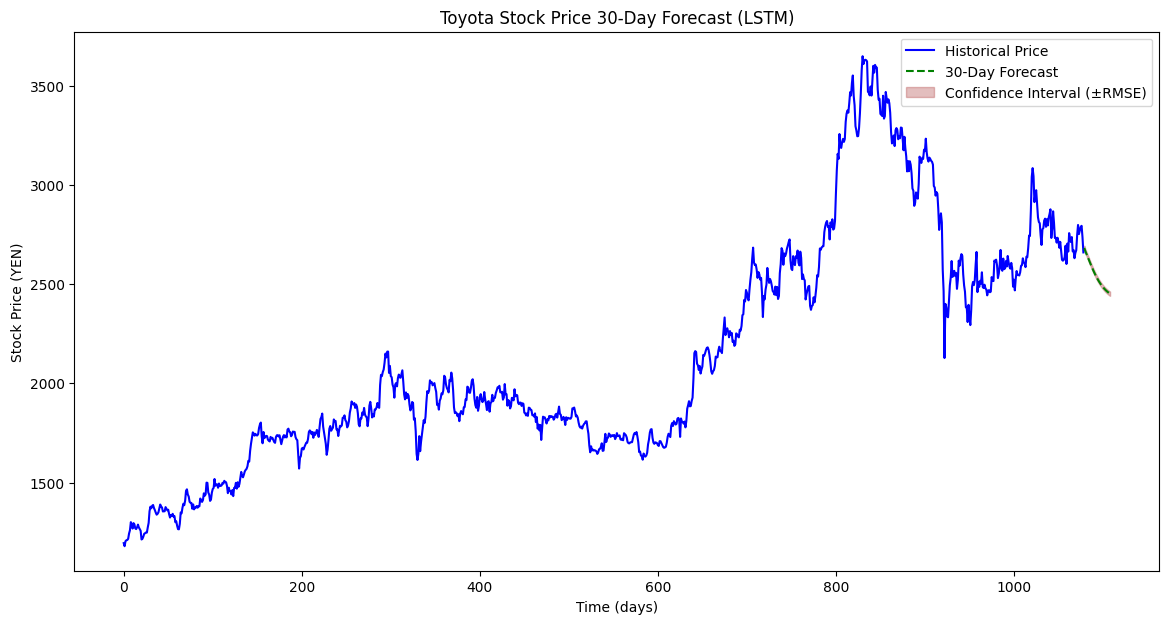

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

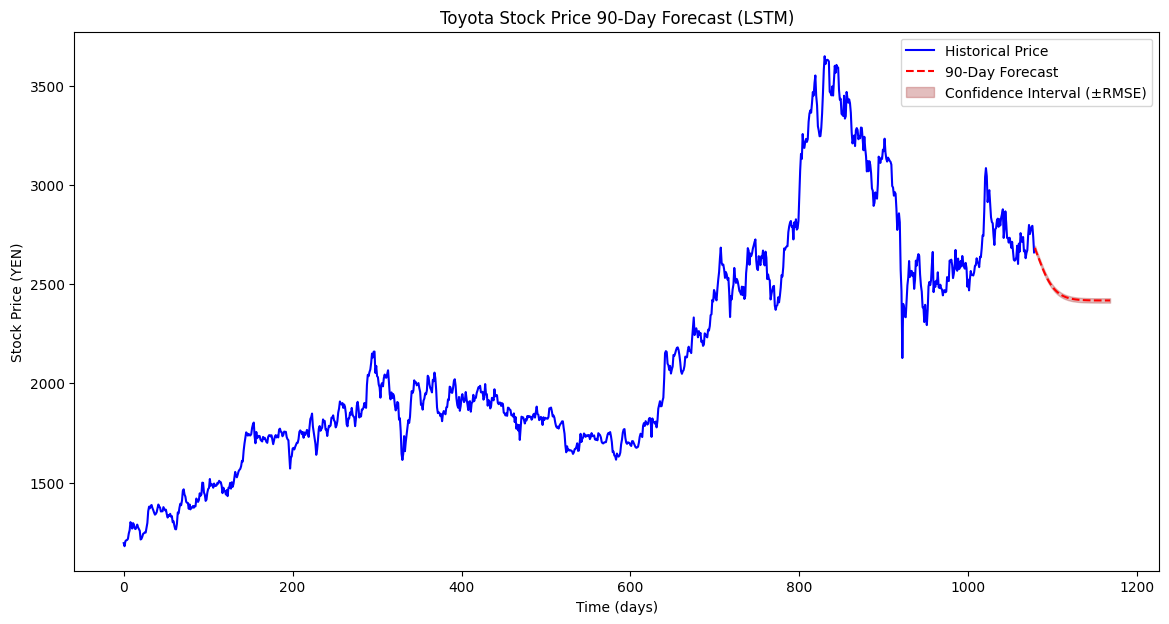

In [ ]:
# function for 30 day forecast and 90 day forecast for Toyota
def forecast_stock_price(model, scaler_toyota, scaled_data_toyota, seq_length, future_days):
    future_predictions = []
    current_sequence = scaled_data_toyota[-seq_length:]  # Start with the last 'seq_length' days
    for _ in range(future_days):
        current_sequence_reshaped = np.expand_dims(current_sequence, axis=0)  # Reshape for model
        next_pred = model.predict(current_sequence_reshaped)
        future_predictions.append(next_pred[0, 0])
        # Update the sequence by appending the new prediction and removing the oldest entry
        next_entry = np.array([next_pred[0, 0], current_sequence[-1, 1], current_sequence[-1, 2], current_sequence[-1, 3]])  # Keep MA50, MA200, Volatility unchanged
        current_sequence = np.vstack((current_sequence[1:], next_entry))  # Slide the window
    # Rescale future predictions back to original values
    future_predictions_rescaled = scaler_toyota.inverse_transform(np.concatenate((np.array(future_predictions).reshape(- 1, 1), np.zeros((future_days, 3))), axis=1))[:, 0]
    return future_predictions_rescaled
# 30 day forecast for Toyota
future_days = 30
future_predictions_rescaled = forecast_stock_price(model, scaler_toyota, scaled_data_toyota, seq_length, future_days)
print("30-Day Future Price Predictions for Toyota:", future_predictions_rescaled)
plt.figure(figsize=(14,7))
plt.plot(range(len(toyota)), toyota['Close'], label="Historical Price", color="blue")
plt.plot(range(len(toyota), len(toyota) + future_days), future_predictions_rescaled, label="30-Day Forecast", color="green", linestyle="--")
rmse = math.sqrt(mean_squared_error(y_test_rescaled, predictions))  
upper_bound = future_predictions_rescaled + rmse
lower_bound = future_predictions_rescaled - rmse
plt.fill_between(range(len(toyota), len(toyota) + future_days), lower_bound, upper_bound, color='brown', alpha=0.3, label='Confidence Interval (±RMSE)')
plt.title("Toyota Stock Price 30-Day Forecast (LSTM)")  
plt.xlabel("Time (days)")
plt.ylabel("Stock Price (YEN)")
plt.legend()
plt.show()
# 90 day forecast for Toyota
future_days = 90
future_predictions_rescaled = forecast_stock_price(model, scaler_toyota, scaled_data_toyota, seq_length, future_days)
print("90-Day Future Price Predictions for Toyota:", future_predictions_rescaled)
plt.figure(figsize=(14,7))
plt.plot(range(len(toyota)), toyota['Close'], label="Historical Price", color="blue")
plt.plot(range(len(toyota), len(toyota) + future_days), future_predictions_rescaled, label="90-Day Forecast", color="red", linestyle="--")
rmse = math.sqrt(mean_squared_error(y_test_rescaled, predictions))  
upper_bound = future_predictions_rescaled + rmse
lower_bound = future_predictions_rescaled - rmse
plt.fill_between(range(len(toyota), len(toyota) + future_days), lower_bound, upper_bound, color='brown', alpha=0.3, label='Confidence Interval (±RMSE)')
plt.title("Toyota Stock Price 90-Day Forecast (LSTM)")
plt.xlabel("Time (days)")
plt.ylabel("Stock Price (YEN)")
plt.legend()
plt.show()


In [ ]:
#mape 
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test_rescaled, predictions)
print(f'Mean Absolute Percentage Error: {mape}%')

Mean Absolute Percentage Error: 1.8462561838627822%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

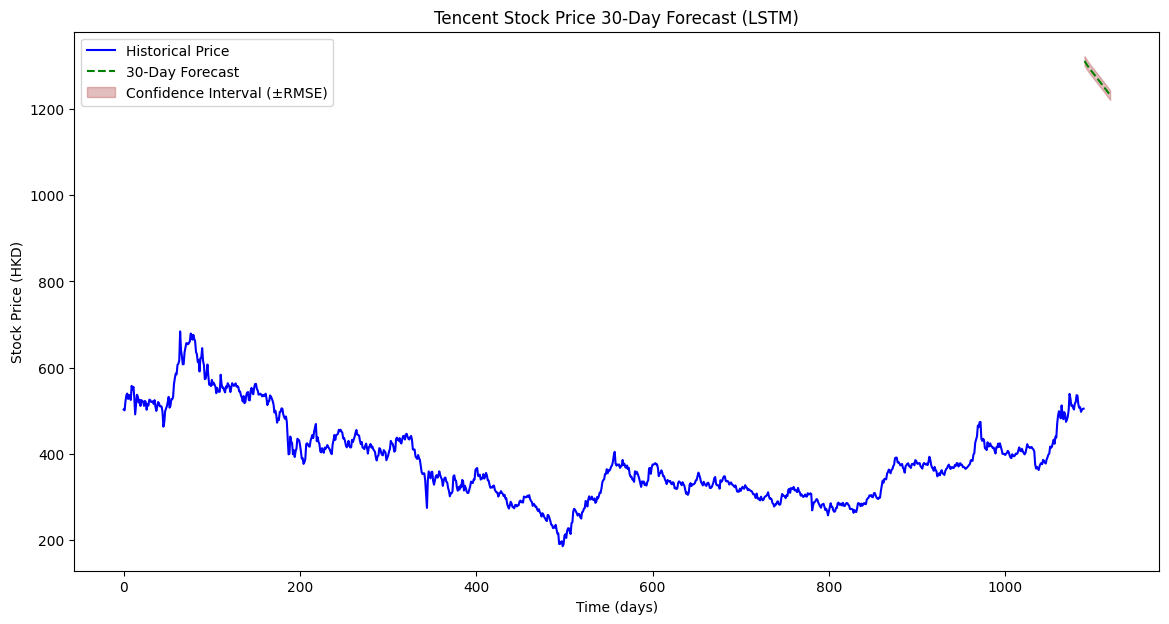

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

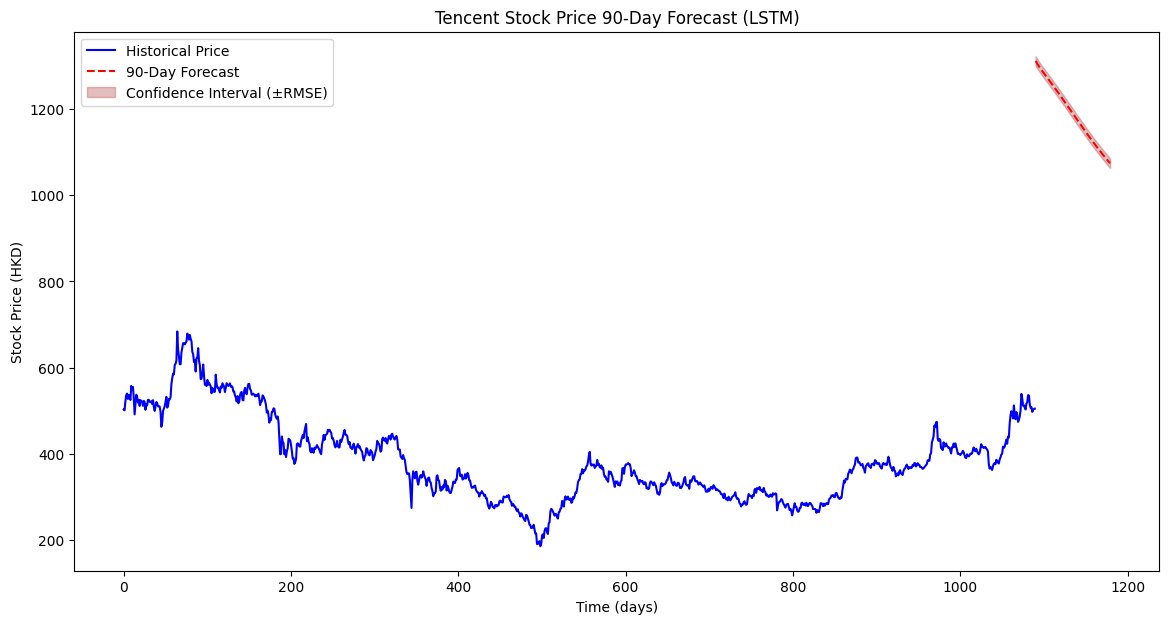

In [ ]:
#Function for 30 day forecast and 90 day forecast for Tencent
def forecast_stock_price(model, scaler_tencent, scaled_data_tencent, seq_length, future_days):
    future_predictions = []
    current_sequence = scaled_data_tencent[-seq_length:]  # Start with the last 'seq_length' days
    for _ in range(future_days):
        current_sequence_reshaped = np.expand_dims(current_sequence, axis=0)  # Reshape for model
        next_pred = model.predict(current_sequence_reshaped)
        future_predictions.append(next_pred[0, 0])
        # Update the sequence by appending the new prediction and removing the oldest entry
        next_entry = np.array([next_pred[0, 0], current_sequence[-1, 1], current_sequence[-1, 2], current_sequence[-1, 3]])  # Keep MA50, MA200, Volatility unchanged
        current_sequence = np.vstack((current_sequence[1:], next_entry))  # Slide the window
    # Rescale future predictions back to original values
    future_predictions_rescaled = scaler.inverse_transform(np.concatenate((np.array(future_predictions).reshape(- 1, 1), np.zeros((future_days, 3))), axis=1))[:, 0]
    return future_predictions_rescaled
# 30 day forecast for Tencent
future_days = 30
future_predictions_rescaled = forecast_stock_price(model, scaler_tencent, scaled_data_tencent, seq_length, future_days)
print("30-Day Future Price Predictions for Tencent:", future_predictions_rescaled)
plt.figure(figsize=(14,7))
plt.plot(range(len(tencent)), tencent['Close'], label="Historical Price", color="blue")
plt.plot(range(len(tencent), len(tencent) + future_days), future_predictions_rescaled, label="30-Day Forecast", color="green", linestyle="--")
rmse = math.sqrt(mean_squared_error(y_test_rescaled, predictions))
upper_bound = future_predictions_rescaled + rmse
lower_bound = future_predictions_rescaled - rmse
plt.fill_between(range(len(tencent), len(tencent) + future_days), lower_bound, upper_bound, color='brown', alpha=0.3, label='Confidence Interval (±RMSE)')
plt.title("Tencent Stock Price 30-Day Forecast (LSTM)")
plt.xlabel("Time (days)")
plt.ylabel("Stock Price (HKD)")
plt.legend()
plt.show()
# 90 day forecast for Tencent
future_days = 90
future_predictions_rescaled = forecast_stock_price(model, scaler_tencent, scaled_data_tencent, seq_length, future_days)
print("90-Day Future Price Predictions for Tencent:", future_predictions_rescaled)
plt.figure(figsize=(14,7))
plt.plot(range(len(tencent)), tencent['Close'], label="Historical Price", color="blue")
plt.plot(range(len(tencent), len(tencent) + future_days), future_predictions_rescaled, label="90-Day Forecast", color="red", linestyle="--")
rmse = math.sqrt(mean_squared_error(y_test_rescaled, predictions))
upper_bound = future_predictions_rescaled + rmse
lower_bound = future_predictions_rescaled - rmse
plt.fill_between(range(len(tencent), len(tencent) + future_days), lower_bound, upper_bound, color='brown', alpha=0.3, label='Confidence Interval (±RMSE)')
plt.title("Tencent Stock Price 90-Day Forecast (LSTM)")
plt.xlabel("Time (days)")
plt.ylabel("Stock Price (HKD)")
plt.legend()
plt.show()

In [ ]:
#mape 
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test_rescaled, predictions)
print(f'Mean Absolute Percentage Error: {mape}%')

Mean Absolute Percentage Error: 1.8462561838627822%


Naïve MAPE: 0.025186678864682992
LSTM MAPE: 0.018825383912712053


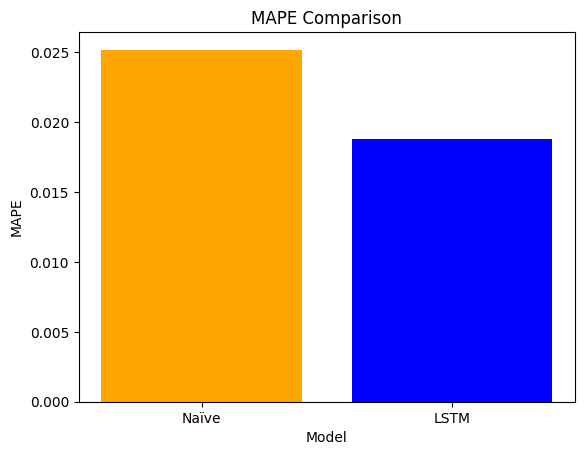

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape_lstm = mean_absolute_percentage_error(y_test_rescaled, predictions)
# Naïve forecast = previous day's actual price (use last train price for the first test day)
last_train_price = scaler.inverse_transform(
    np.concatenate((y_train[-1].reshape(-1, 1), np.zeros((1, 3))), axis=1)
)[:, 0][0]
naive_pred = np.concatenate(([last_train_price], y_test_rescaled[:-1]))
naive_true = y_test_rescaled
mape_naive = mean_absolute_percentage_error(naive_true, naive_pred)
print("Naïve MAPE:", mape_naive)
print("LSTM MAPE:", mape_lstm)

plt.Figure(figsize=(10,5))
plt.bar(['Naïve', 'LSTM'], [mape_naive, mape_lstm], color=['orange', 'blue'])
plt.title('MAPE Comparison')
plt.xlabel('Model')
plt.ylabel('MAPE')   
plt.show()